# BI8040 - notebook project - Eirini & Vasundra

## Model of interest: Mammalian cell cycle
Based on the following publication: [Logical model specification aided by model-checking techniques: application to the mammalian cell cycle regulation](https://doi.org/10.1093/bioinformatics/btw457)

First, import the necessary tools and load the model.
The model has been updated with two output nodes to better represent results.

Add the "map" we did manually

In [1]:
import ginsim 
import biolqm
import maboss
import pypint
from colomoto_jupyter import tabulate
from itertools import combinations
import matplotlib.pyplot as plt

You are using Pint version 2018-03-22 and pypint 1.4.1

In [2]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml")

Downloading 'http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml'

In [3]:
lrg = ginsim.load("./model_outputs.zginml")

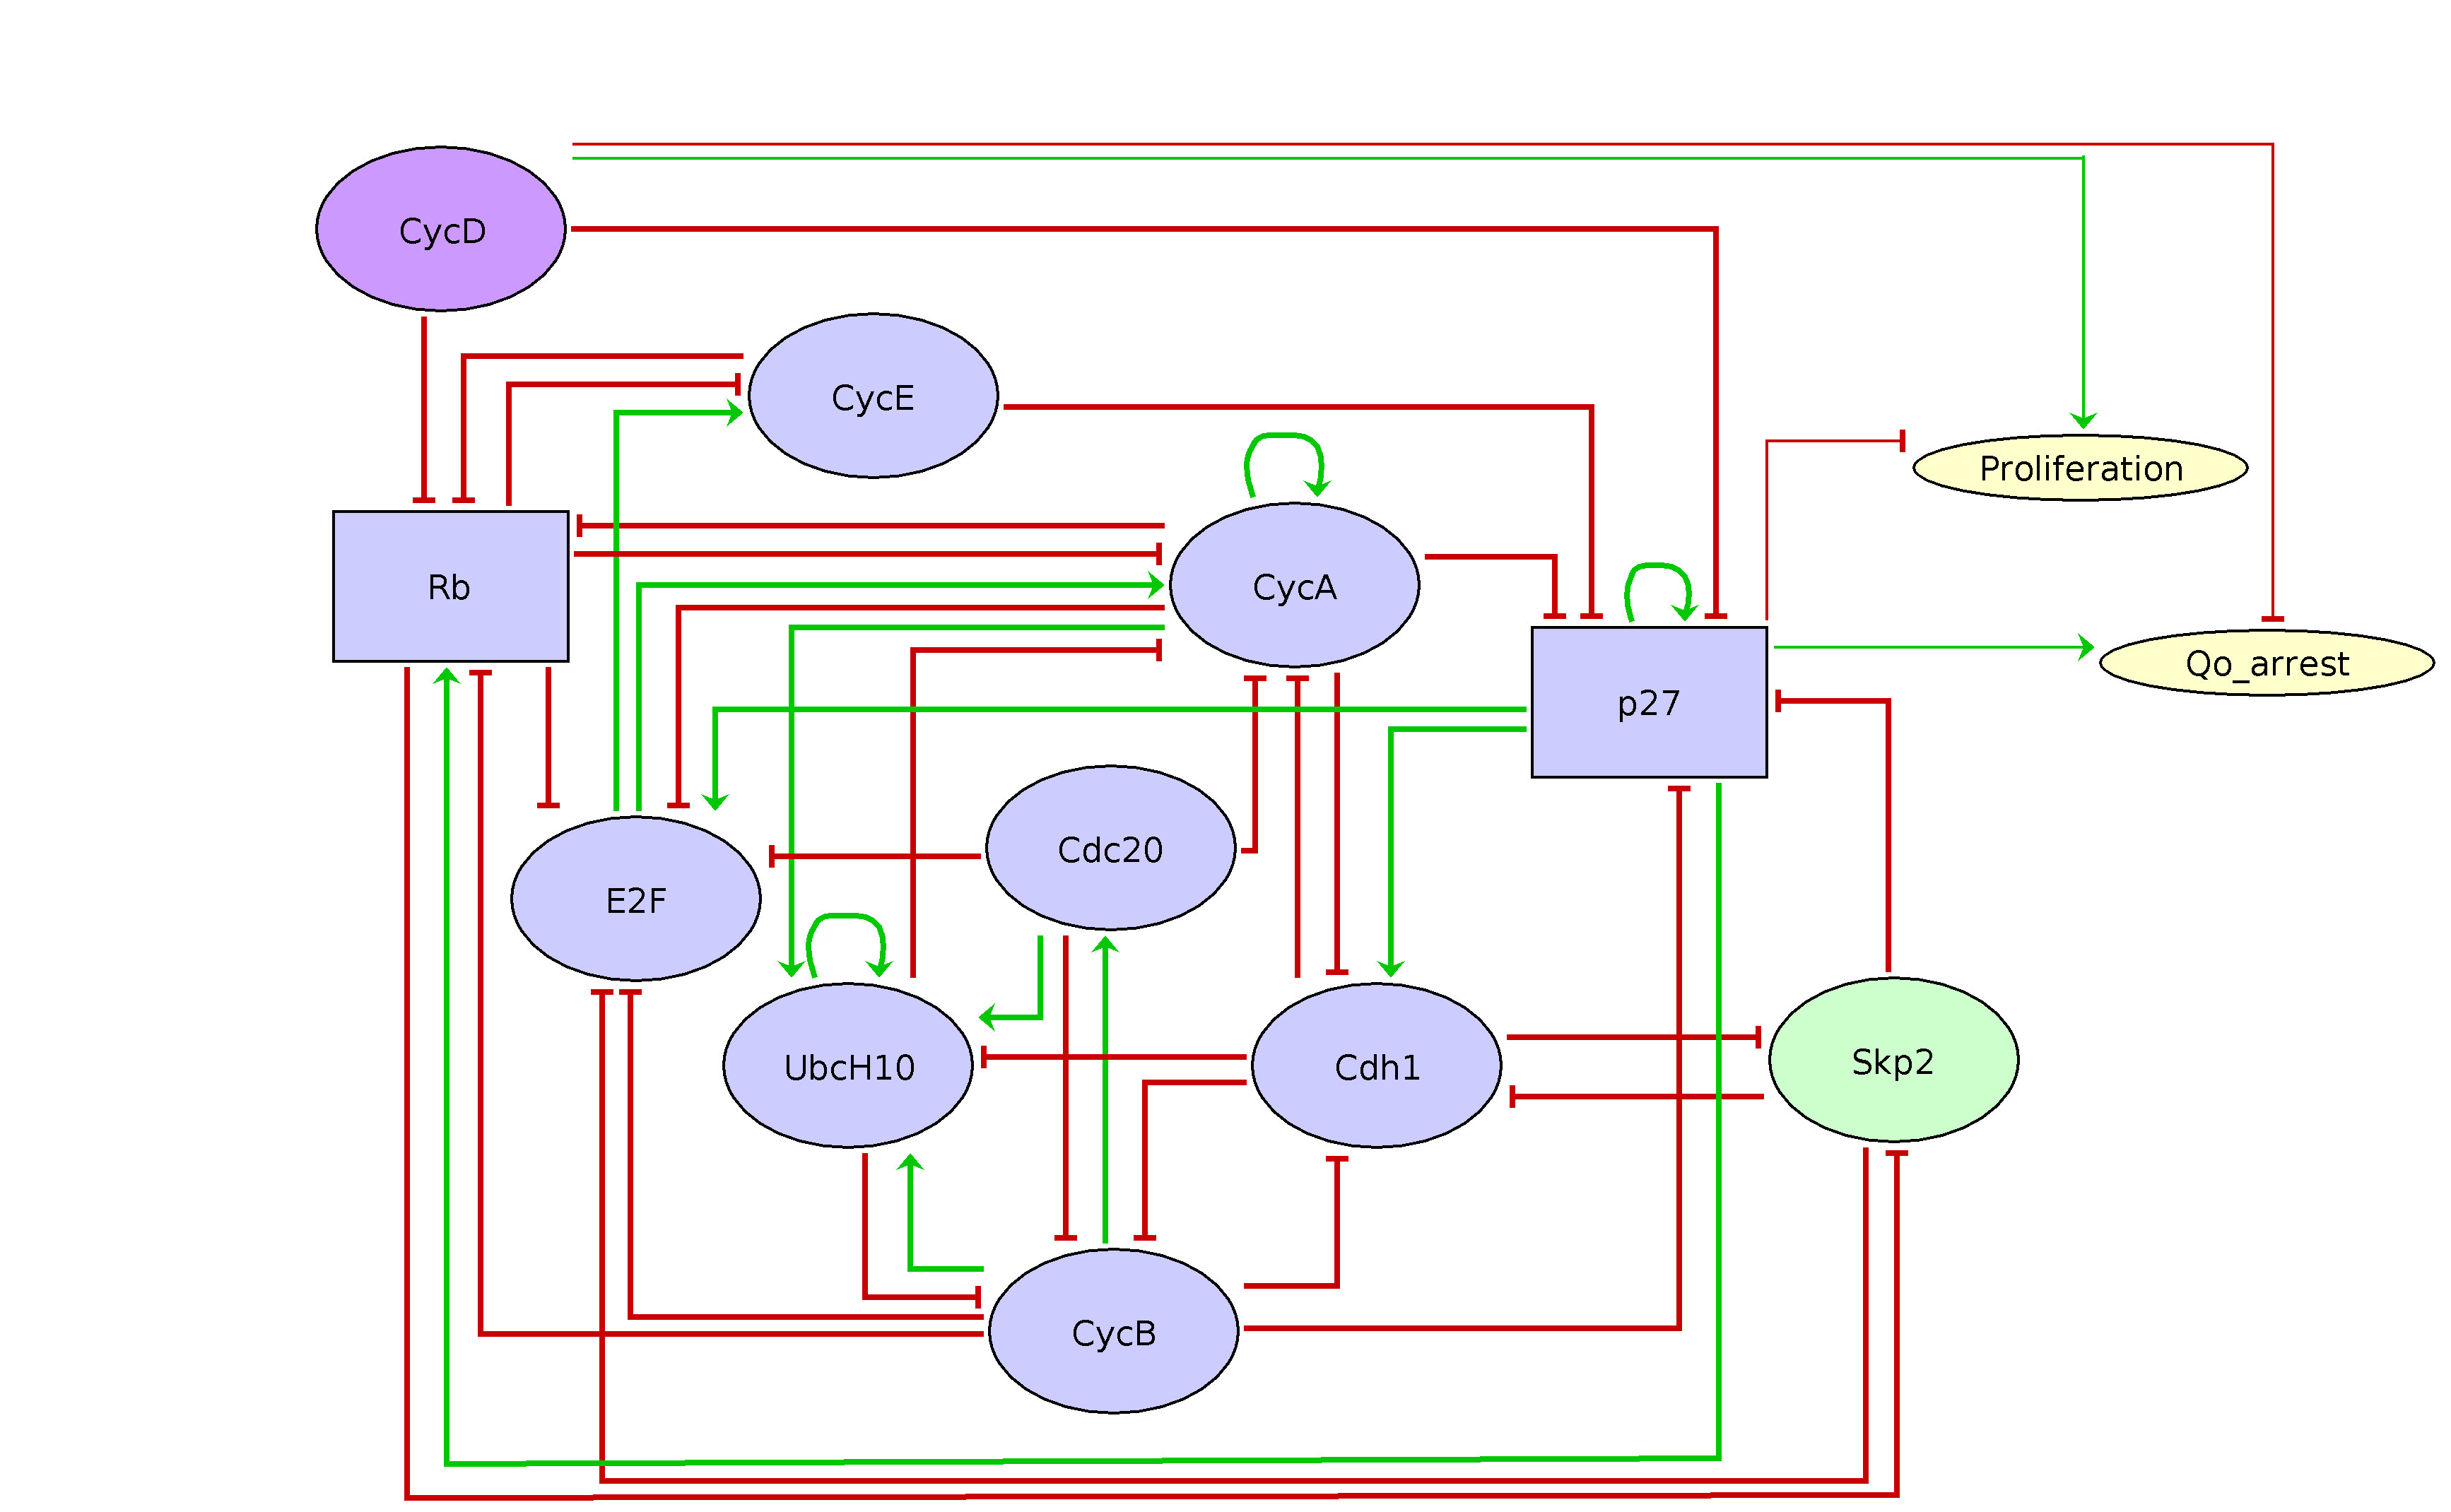

In [4]:
ginsim.show(lrg)

### Identification of stable state (asynchronous) - BIOLQM

1) Wild-type model

Add trap space analysis to find cycle attractors

In [7]:
lqm = ginsim.to_biolqm(lrg)

'''Compute trap space analysis'''
traps = biolqm.trapspace(lqm)
tabulate(traps)

|    |   CycD |   Rb_b1 |   Rb_b2 |   E2F |   CycE |   CycA |   CycB |   p27_b1 |   p27_b2 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|--------:|--------:|------:|-------:|-------:|-------:|---------:|---------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      1 |     255 |       0 |   255 |    255 |    255 |    255 |      255 |        0 |     255 |    255 |      255 |      1 |             255 |           0 |
|  1 |      0 |       1 |       1 |     0 |      0 |      1 |      0 |        1 |        1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      0 |       1 |       1 |     0 |      0 |      0 |      0 |        1 |        1 |       0 |      1 |        0 |      0 |               0 |           1 |

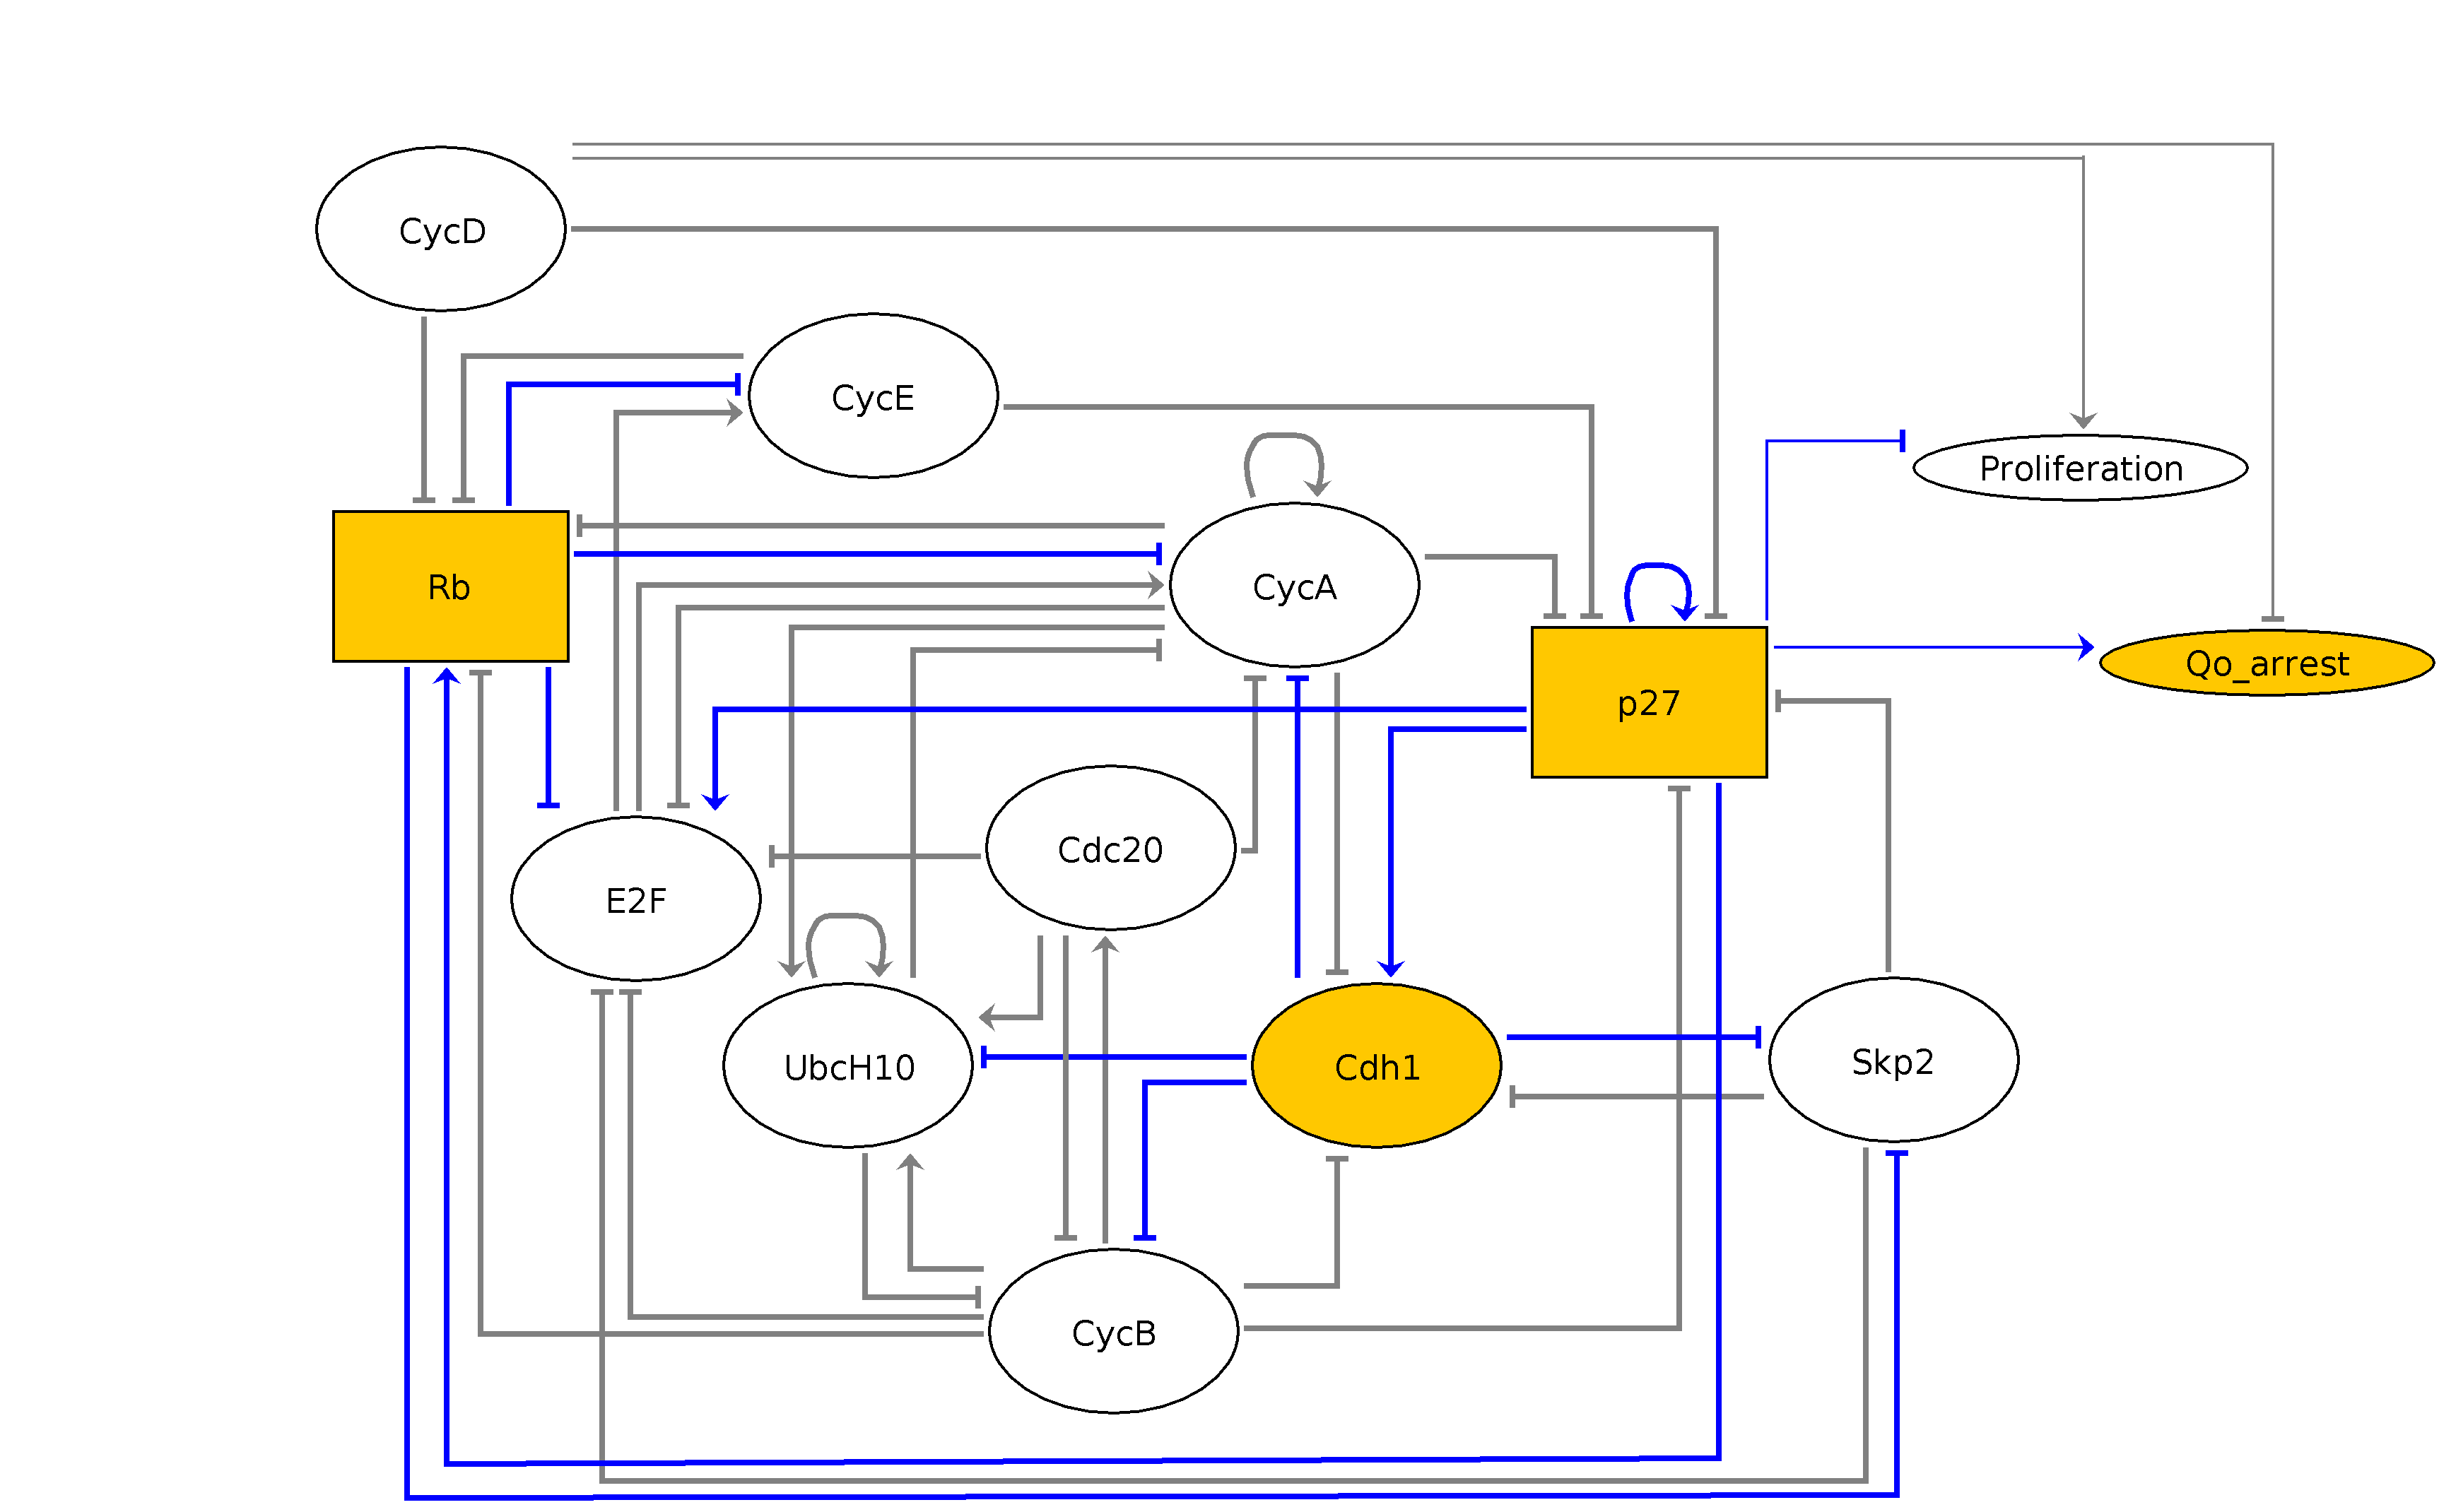

In [5]:
'''Compute stable states'''
fixpoints = biolqm.fixpoints(lqm)
tabulate(fixpoints)

'''Visualisation'''
ginsim.show(lrg, fixpoints[0])

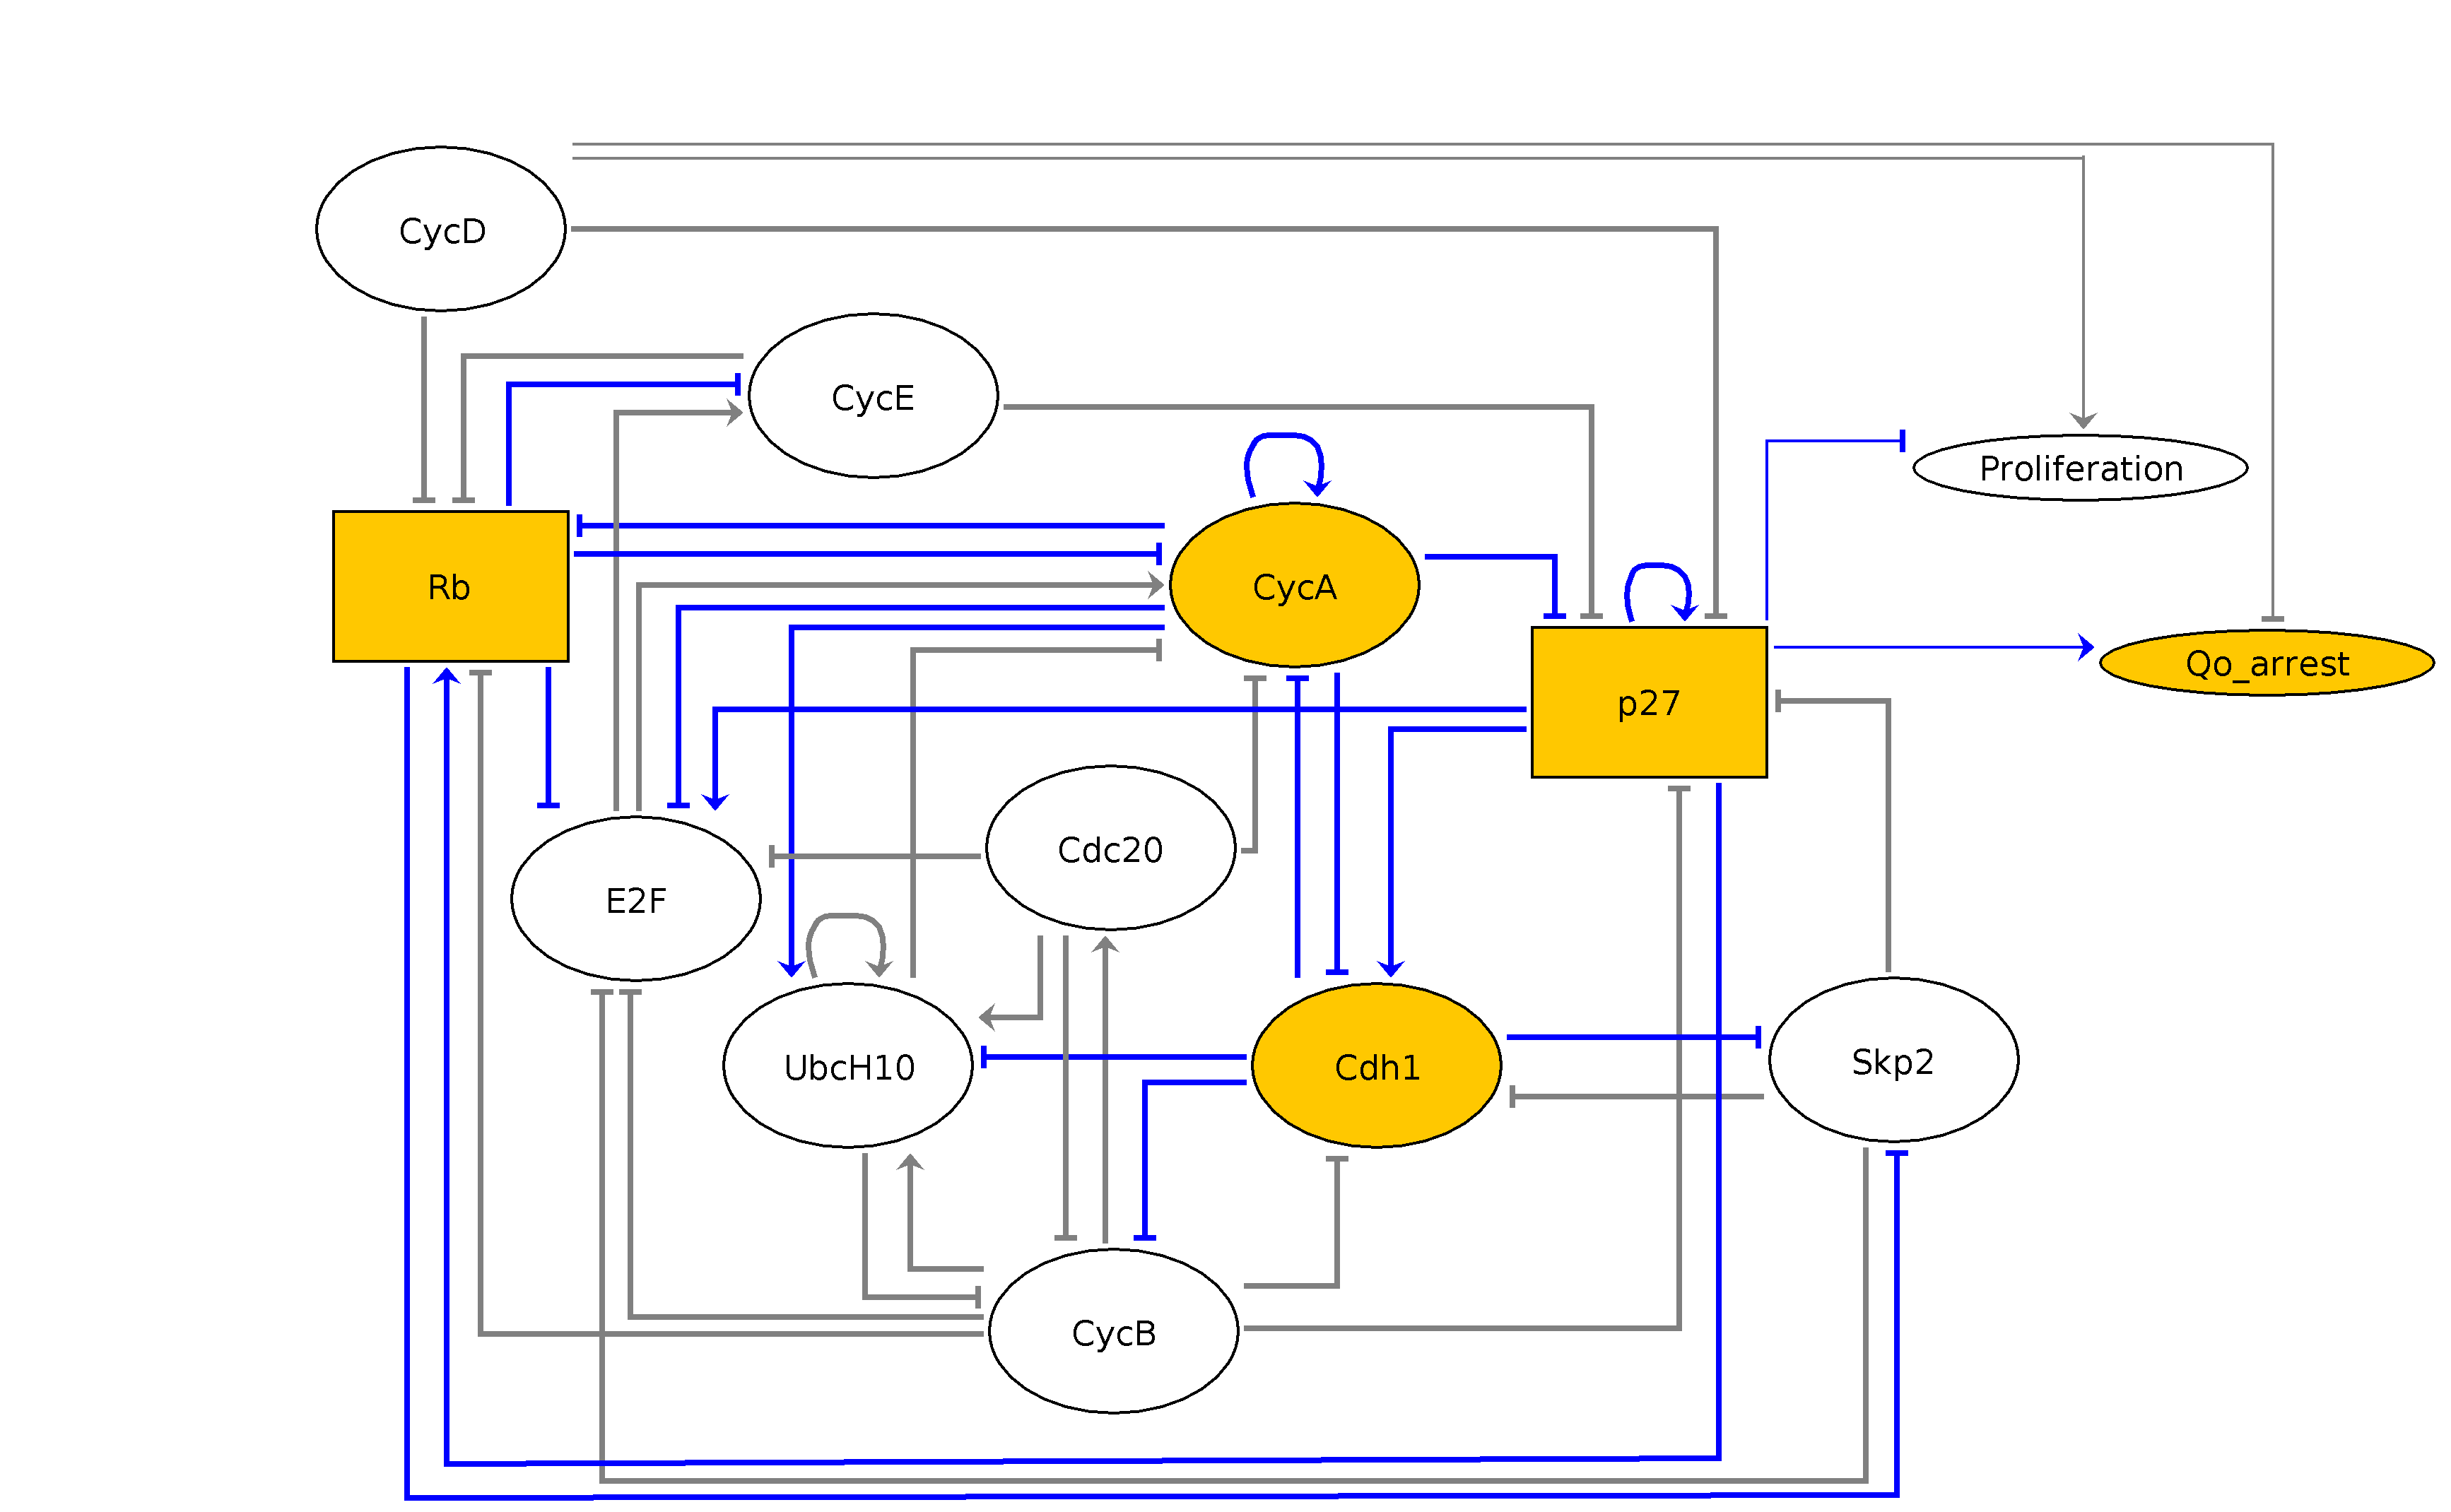

In [6]:
ginsim.show(lrg, fixpoints[1])

2) Perturbations

We generate here the perturbations from the paper
Ectopic means: force the node to be at 1

First example shows how to do one perturbation. 
Then we automatized the process by providing the list of perturbations to test.

In [ ]:
ectopic_cyce = biolqm.perturbation(lqm,"CycE%1")
tabulate(biolqm.fixpoints(ectopic_cyce))

Below is the list of perturbations to test made suitable for BIOLQM:

In [9]:
perturbations = ["CycE%1", 
                 "p27%1", 
                 "p27% CycA%1", 
                 "p27%1 CycE%1", 
                 "p27%1 E2F%1",
                 "Rb%2", "Cdh1%0", 
                 "Rb%0", 
                 "Rb%0 E2F%1", 
                 "E2F%1 Rb%1 CycE:Rb%0 CycA:Rb%0", 
                 "CycE%0 CycA%0", 
                 "UbcH10%0", 
                 "Rb%1 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "Skp2%0", 
                 "Skp2%0 p27%0", 
                 "Skp2%1 Rb%2 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "Rb%1 p27%0 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0"]

fixpointlist = {}
for p in perturbations:
    fixpoints = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    fixpointlist[p] = fixpoints
    
for k, v in fixpointlist.items():
    print(k, display(tabulate(v)))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      1 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      1 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |

CycE%1 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |               0 |           0 |

p27%1 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        1 |      0 |               0 |           1 |

p27% CycA%1 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      1 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |               0 |           0 |

p27%1 CycE%1 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     1 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     1 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |               0 |           0 |

p27%1 E2F%1 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      1 |    2 |     0 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           0 |
|  3 |      1 |    2 |     0 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           0 |

Rb%2 None


Cdh1%0 None


Rb%0 None


Rb%0 E2F%1 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               0 |           0 |
|  1 |      0 |    1 |     1 |      1 |      0 |      0 |     2 |       0 |      1 |        0 |      1 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               1 |           0 |

E2F%1 Rb%1 CycE:Rb%0 CycA:Rb%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      1 |    1 |     1 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |               0 |           0 |

CycE%0 CycA%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    0 |     0 |      0 |      0 |      1 |     0 |       1 |      0 |        0 |      1 |               0 |           0 |
|  1 |      0 |    0 |     0 |      0 |      1 |      1 |     0 |       1 |      0 |        0 |      1 |               0 |           0 |
|  2 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  3 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  4 |      1 |    0 |     0 |      0 |      0 |      1 |     0 |       1 |      0 |        0 |      1 |               1 |           0 |
|  5 |      1 |    0 |     0 |      0 |      1 |      1 |     0 |       1 |      0 |        0 |      1 |               1 |           0 |

UbcH10%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               0 |           0 |
|  1 |      0 |    1 |     1 |      1 |      0 |      0 |     2 |       0 |      1 |        0 |      1 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               1 |           0 |

Rb%1 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               1 |           0 |

E2F:Rb%0 CycE:Rb%0 CycA:Rb%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |               0 |           1 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           0 |
|  3 |      1 |    1 |     1 |      1 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |               0 |           0 |

Skp2%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     0 |       0 |      1 |        0 |      0 |               0 |           0 |

Skp2%0 p27%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      1 |               0 |           1 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      1 |               0 |           1 |
|  2 |      1 |    2 |     0 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |               0 |           0 |

Skp2%1 Rb%2 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0 None


|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |   Proliferation |   Qo_arrest |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|----------------:|------------:|
|  0 |      0 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               0 |           0 |
|  1 |      1 |    1 |     1 |      1 |      0 |      0 |     0 |       0 |      1 |        0 |      1 |               1 |           0 |

Rb%1 p27%0 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0 None


In [32]:
'''List of perturbations with the nb of stable states '''
perturbstates=[]

'''List of table state values same order as perturbStates, with '''
stablestates = [] 

'''Node of nodes'''
'''nodelist = ['CycD', 'Rb', 'E2F', 'CycE', 'CycA', 'CycB', 'p27', 'Cdc20', 'Cdh1', 'UbcH10', 'Skp2', 'Proliferation', 'Arrest']'''
nodelist = ['CycD', 'Rb', 'E2F', 'CycE', 'CycA', 'CycB', 'p27', 'Cdc20', 'Cdh1', 'UbcH10', 'Skp2']

for k,v in fixpointlist.items():   
    if not v:
        print('No Stable state found for: ', k)
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

No Stable state found for:  Cdh1%0
No Stable state found for:  Rb%0
No Stable state found for:  Rb%0 E2F%1


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import DataFrame

In [33]:
'''Create dataframe from the different lists above: columns = nodes, rows = perturbations'''
df = DataFrame(data=stablestates)
df = df.iloc[:, :-2] '''we remove the output nodes Proliferation and Qo_arrest'''
df.columns = nodelist
df.index = perturbstates

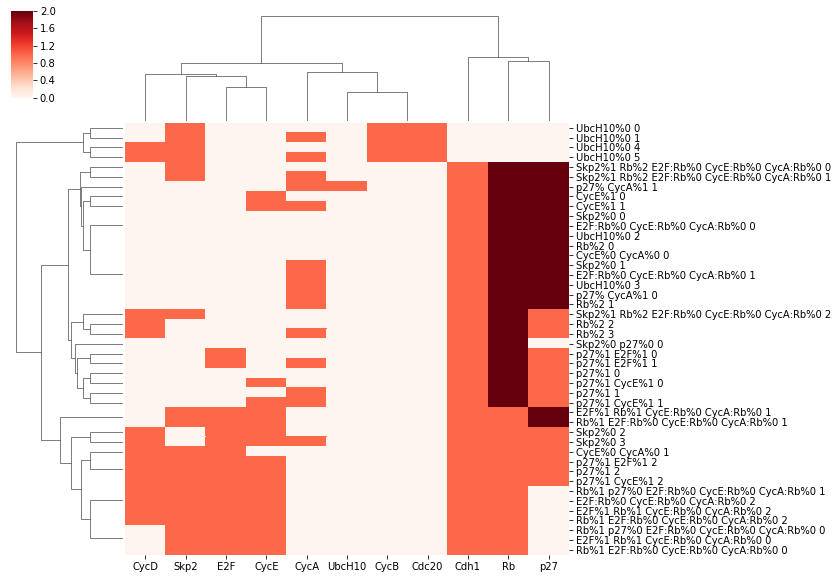

In [52]:
'''mpl.rcParams['figure.figsize'] = (15,10)
cmap_name = 'Greys'
plt.pcolor(df, cmap = cmap_name)

plt.xticks(np.arange(len(df.columns))+0.5, df.columns)
plt.yticks(np.arange(len(df.index))+0.5, df.index)
    
plt.show()'''


sns.clustermap(df, metric='euclidean', cmap = 'Reds', yticklabels=True)

### MODEL CHECKING

In [2]:
from colomoto.temporal_logics import *

In [3]:
smv = ginsim.to_nusmv(lrg)

NameError: name 'ginsim' is not defined

In [4]:
smv.add_instruction("""Cycle1 := (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1)| (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=0 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=0 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=1 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=0 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=0 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=0 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=0 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=0 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=0 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1) | (CycD=1 & Rb=1 & E2F=1 & CycE=1 & CycA=0 & CycB=1 & p27=1 & Cdc20=1 & Cdh1=1 & UbcH10=1 & Skp2=1);""")

NameError: name 'smv' is not defined

In [ ]:
smv.add_init("CycE=0 & CycA=0 & CycB=0 & Cycle1 & Rb=1 & p27=1 & Cdh1=1 & Cdc20=0 & UbcH10=0 & Cdc20=0 & E2F=0;")

In [ ]:
smv.add_instruction("SPEC !E[(CycE=0 & CycA=0 & CycB=0  & Cycle1) U ( CycE=1 & CycA=0 & CycB=0  & Cycle1 & E[( CycE=1 & CycA=0 & CycB=0  & Cycle1) U ( CycE=1 & CycA=1 & CycB=0  & Cycle1 & E[( CycE=1 & CycA=1 & CycB=0  & Cycle1) U ( CycE=0 & CycA=1 & CycB=0  & Cycle1 & E[( CycE=0 & CycA=1 & CycB=0  & Cycle1) U ( CycE=0 & CycA=1 & CycB=1  & Cycle1 & E[( CycE=0 & CycA=1 & CycB=1  & Cycle1) U ( CycE=0 & CycA=0 & CycB=1  & Cycle1 & E[( CycE=0 & CycA=0 & CycB=1  & Cycle1) U ( CycE=0 & CycA=0 & CycB=0  & Cycle1)])])])])])];")

In [ ]:
smv.verify()

### PINT AND MABOSS: find mutations not leading to a SS 

In [ ]:
wt_sim = biolqm.to_maboss(lqm)

In [ ]:
wt_sim.network.set_istate("CycD", [0.5,0.5])

In [ ]:
wt_sim.update_parameters(max_time=50)

In [ ]:
wt_res = wt_sim.run()

In [ ]:
wt_res.plot_piechart()

In [ ]:
wt_res.plot_node_trajectory(until=40)

In [ ]:
m = biolqm.to_pint(lqm)

In [ ]:
m.initial_state["CycD"] = 1

In [ ]:
mutants = m.oneshot_mutations_for_cut("Rb=2, p27=1, Cdh1=1")
mutants

In [ ]:
from itertools import combinations
from functools import reduce

In [ ]:
mutants_comb = [combinations(m.items(),2) for m in mutants if len(m) >= 2]
candidates = reduce(set.union, mutants_comb, set())
candidates

In [ ]:
for mutant in sorted(candidates):
    mut_sim = wt_sim.copy()
    for (node, value) in mutant:
        mut_sim.mutate(node, "ON" if value else "OFF")
    mut_res = mut_sim.run()
    mut_res.plot_piechart(embed_labels=False, autopct=4)
    mutant_name = "/".join(["%s:%s"%m for m in mutant])
    plt.title("%s mutant" %mutant_name)
    